# **Importing the Necessary Packages and Configuring Settings**

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import numpy as np
import pandas as pd
!pip install aif360
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing
from sklearn.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.1/214.1 kB 3.9 MB/s eta 0:00:00


pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


In [ ]:
#Kaggle API key
os.environ['KAGGLE_USERNAME'] = ""
os.environ['KAGGLE_KEY'] = ""

import kaggle

In [ ]:
# Download Kaggle dataset (student-por.csv)
kaggle.api.dataset_download_files(dataset='larsen0966/student-performance-data-set', unzip=True)

In [ ]:
# Create a figures folder to hold images
try:
	os.makedirs('figures', exist_ok = True)
	print("Created successfully")
except OSError as error:
	print("This folder can not be created")

Created successfully



# **Step 1:**

### **1.1.   Selected Dataset**

We chose the "Student Performance Data Set" (SPDS) dataset, which is publicly
available through Kaggle’s dataset repository (Cortez, 2019). At a high level,
the dataset’s features cumulatively reflect each subject’s demography and so-
cial background. Each subject’s record within the dataset also contains variables conveying characteristics about their school and the grades they received in a Portuguese language class within certain periods. Of note, the dataset’s description on Kaggle shows that it was initially comprised of two sub-datasets - one about students in the Portuguese language class and another about students in a Math class. The following analysis only relates to the Portuguese language class portion of the dataset, as this was the only sub-dataset found on Kaggle.

In [ ]:
# Reading the SPDS dataset into dataframe & displaying several rows from the head/tail
df = pd.read_csv('./student-por.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


### **1.2 Regulated Domain**

Among other features, each record within the SPDS dataset conveys relevant
data about one Portuguese school student’s (i.e., one subject’s) earned grades
(Cortez, 2019). Given this student-centric data, the dataset can be said to belong to the Regulated Domain of Education.

### **1.3 Count of Observations and Variables**

The SPDS dataset contains 649 observations, with each observation pertaining to
data obtained from one Portuguese school student (Cortez, 2019). Furthermore,
each observation encompasses 33 variables that collectively convey information
about each subject’s demographics, social background, school characteristics, and grades.

In [ ]:
print('Number of observations in the SPDS dataset: ' + str(df.shape[0]))
print('Number of variables in the SPDS dataset: ' + str(df.shape[1]))

Number of observations in the SPDS dataset: 649
Number of variables in the SPDS dataset: 33


### **1.4 Dependent Variables**

Of the 33 variables available in the SPDS dataset, three were selected for use
as dependent variables - "G1", "G2", and "G3" (Cortez, 2019). Each dependent
variable is a quantitative, continuous variable that reflects a student’s grade after a particular school year period (first, second, or third). Specifically, G1 represents a subject’s grade after the first period of the school year, G2 represents a subject’s grade after the second period of the school year, and G3 represents a subject’s grade after the third (and final) period of the school year.

In [ ]:
# Displaying the top few rows of the selected dependent variables (G1, G2, and G3)
df[['G1','G2','G3']].head(5)

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


### **1.5 Protected Class Variables**

**Four variables in the SPDS dataset** appear to pertain to a protected class that is legally protected (Cortez, 2019). The specific variables, relevant protected class, and associated laws or legal precedents are displayed below in "Table 1".


> Table 1 — A table communicating the legally recognized protected class variables found within the SPDS dataset and their associated
legal precedent(s)/law(s).

In [ ]:
# Recreating "Table 1" from the report, which displays the legally recognized
# protected class variables from the dataset
table_1 = pd.DataFrame(data={
  "Dataset Variable": ["age","famsize","Pstatus","sex"],
  "Protected Class": ["Age","Familial Status","Familial Status","Sex"],
  "Associated Law(s)/Legal Precedent(s)": ["Age Discrimination in Employment Act of 1967",
                                           "Civil Rights Act of 1968",
                                           "Civil Rights Act of 1968",
                                           "Equal Pay Act of 1963; Civil Rights Act of 1964, 1991"]
})

table_1.loc[:,'Dataset Variable':'Associated Law(s)/Legal Precedent(s)']

,Dataset Variable,Protected Class,Associated Law(s)/Legal Precedent(s)
0,age,Age,Age Discrimination in Employment Act of 1967
1,famsize,Familial Status,Civil Rights Act of 1968
2,Pstatus,Familial Status,Civil Rights Act of 1968
3,sex,Sex,Equal Pay Act of 1963; Civil Rights Act of 196...


# **Step 2:**

### **2.1 Members Associated with Protected Class Variables**

In [ ]:
# Members associated with the 'age' protected class variable
age_grouped = pd.DataFrame({
    'Age': [15,16,17,18,19,20,21,22],
    'Count': df['age'].value_counts().sort_index()
})

# Combining groups to create subsets of membership categories
age_grouped['Age'] = age_grouped['Age'].map({15:'15-16',16:'15-16',
                                             17:'17-18',18:'17-18',
                                             19:'19+',20:'19+',21:'19+',22:'19+'})
age_grouped = age_grouped.groupby('Age').sum()
print(list(age_grouped.index))

['15-16', '17-18', '19+']


In [ ]:
# Members associated with the 'famsize' protected class variable
print(list(df['famsize'].value_counts().sort_index().index))

['GT3', 'LE3']


In [ ]:
# Members associated with the 'Pstatus' protected class variable
print(list(df['Pstatus'].value_counts().sort_index().index))

['A', 'T']


In [ ]:
# Members associated with the 'sex' protected class variable
print(list(df['sex'].value_counts().sort_index().index))

['F', 'M']


### **2.2 Relationship Between Values and Discretized Variables**

In [ ]:
# Clarifying the frequency of values for the "G1" dependent variable
df['G1'].value_counts().sort_index()

0      1
4      2
5      5
6      9
7     33
8     42
9     65
10    95
11    91
12    82
13    72
14    71
15    35
16    22
17    16
18     7
19     1
Name: G1, dtype: int64

In [ ]:
# Discretizing the "G1" dependent variable based on possible variable values
df['G1_disc'] = df['G1'].map({0:'0-5', 4:'0-5', 5:'0-5',
                             6: '6-10', 7: '6-10', 8: '6-10', 9: '6-10', 10: '6-10',
                             11: '11-15', 12: '11-15', 13: '11-15', 14: '11-15', 15: '11-15',
                             16: '16-19', 17: '16-19', 18: '16-19', 19: '16-19'})
df['G1_disc'].value_counts().sort_index()

0-5        8
11-15    351
16-19     46
6-10     244
Name: G1_disc, dtype: int64

In [ ]:
# Clarifying the frequency of values for the "G2" dependent variable
df['G2'].value_counts().sort_index()

0       7
5       3
6       7
7      16
8      40
9      72
10     83
11    103
12     86
13     80
14     54
15     38
16     25
17     20
18     14
19      1
Name: G2, dtype: int64

In [ ]:
# Discretizing the "G2" dependent variable based on possible variable values
df['G2_disc'] = df['G2'].map({0:'0-5', 5:'0-5',
                             6: '6-10', 7: '6-10', 8: '6-10', 9: '6-10', 10: '6-10',
                             11: '11-15', 12: '11-15', 13: '11-15', 14: '11-15', 15: '11-15',
                             16: '16-19', 17: '16-19', 18: '16-19', 19: '16-19'})
df['G2_disc'].value_counts().sort_index()

0-5       10
11-15    361
16-19     60
6-10     218
Name: G2_disc, dtype: int64

In [ ]:
# Clarifying the frequency of values for the "G3" dependent variable
df['G3'].value_counts().sort_index()

0      15
1       1
5       1
6       3
7      10
8      35
9      35
10     97
11    104
12     72
13     82
14     63
15     49
16     36
17     29
18     15
19      2
Name: G3, dtype: int64

In [ ]:
# Discretizing the "G3" dependent variable based on possible variable values
df['G3_disc'] = df['G3'].map({0:'0-5', 1:'0-5', 5:'0-5',
                             6: '6-10', 7: '6-10', 8: '6-10', 9: '6-10', 10: '6-10',
                             11: '11-15', 12: '11-15', 13: '11-15', 14: '11-15', 15: '11-15',
                             16: '16-19', 17: '16-19', 18: '16-19', 19: '16-19'})
df['G3_disc'].value_counts().sort_index()

0-5       17
11-15    370
16-19     82
6-10     180
Name: G3_disc, dtype: int64

### **2.3 Protected Class Variable Frequency**

In [ ]:
# Frequency for each member associated with the 'age' protected class variable
age_grouped = pd.DataFrame({
    'Age': [15,16,17,18,19,20,21,22],
    'Count': df['age'].value_counts().sort_index()
})
age_grouped['Age'] = age_grouped['Age'].map({15:'15-16',16:'15-16',17:'17-18',18:'17-18',19:'19+',20:'19+',21:'19+',22:'19+'})
age_grouped = age_grouped.groupby('Age').sum()
print(age_grouped)

       Count
Age         
15-16    289
17-18    319
19+       41


In [ ]:
# Frequency for each member associated with the 'famsize' protected class variable
df['famsize'].value_counts().sort_index()

GT3    457
LE3    192
Name: famsize, dtype: int64

In [ ]:
# Frequency for each member associated with the 'Pstatus' protected class variable
df['Pstatus'].value_counts().sort_index()

A     80
T    569
Name: Pstatus, dtype: int64

In [ ]:
# Frequency for each member associated with the 'sex' protected class variable
df['sex'].value_counts().sort_index()

F    383
M    266
Name: sex, dtype: int64

### **2.4 Protected Class Histograms**

##### 2.4.1 Histograms for "age"

###### G1 ("age")

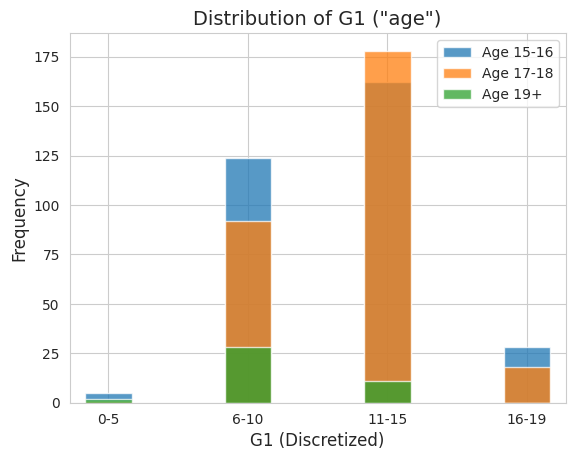

In [ ]:
age = df.copy()
age['age_grouped'] = age['age'].map({15:'15-16',16:'15-16',17:'17-18',18:'17-18',19:'19+',20:'19+',21:'19+',22:'19+'})

# G1 Histogram for "age"
plt.hist(age[age['age_grouped']=='17-18']['G1_disc'],label='Age 17-18',alpha=0.75)
plt.hist(age[age['age_grouped']=='15-16']['G1_disc'],label='Age 15-16',alpha=0.75)
plt.hist(age[age['age_grouped']=='19+']['G1_disc'],label='Age 19+',alpha=0.75,range=('0-5','16-19'))
plt.title('Distribution of G1 ("age")',fontsize=14)
plt.xlabel('G1 (Discretized)',fontsize=12)
plt.xlim([-0.1,3.1])
plt.xticks(ticks=[0.15,1.05,1.95,2.85],labels=['0-5','6-10','11-15','16-19'],fontsize=10)
plt.ylabel('Frequency',fontsize=12)
plt.legend(['Age 15-16','Age 17-18','Age 19+'])
plt.savefig('./figures/G1_age_histogram.jpg')
plt.show()

###### G2 ("age")

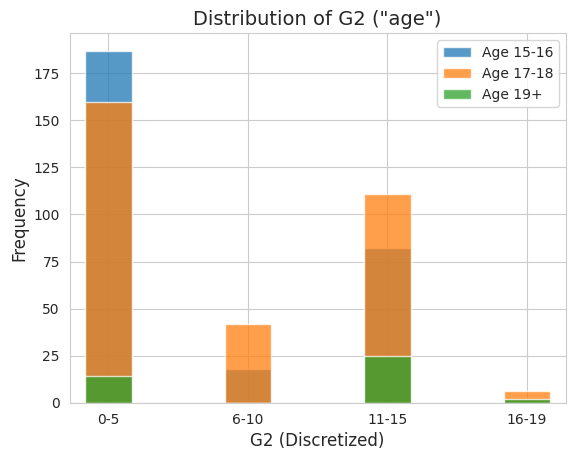

In [ ]:
# G2 Histogram for "age"
plt.hist(age[age['age_grouped']=='15-16']['G2_disc'],label='Age 15-16',alpha=0.75)
plt.hist(age[age['age_grouped']=='17-18']['G2_disc'],label='Age 17-18',alpha=0.75)
plt.hist(age[age['age_grouped']=='19+']['G2_disc'],label='Age 19+',alpha=0.75)
plt.title('Distribution of G2 ("age")',fontsize=14)
plt.xlabel('G2 (Discretized)',fontsize=12)
plt.xlim([-0.1,3.1])
plt.xticks(ticks=[0.15,1.05,1.95,2.85],labels=['0-5','6-10','11-15','16-19'],fontsize=10)
plt.ylabel('Frequency',fontsize=12)
plt.legend(['Age 15-16','Age 17-18','Age 19+'])
plt.savefig('./figures/G2_age_histogram.jpg')
plt.show()

###### G3 ("age")

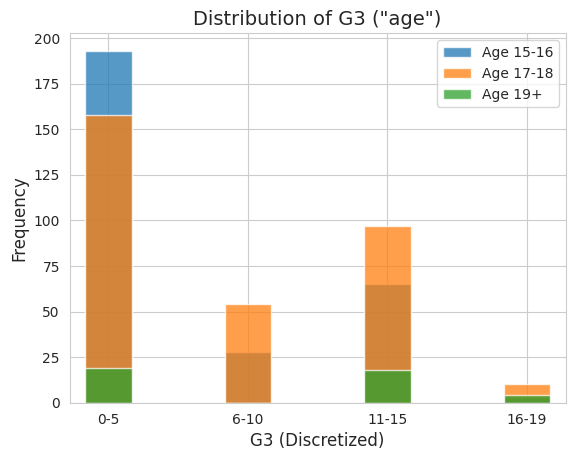

In [ ]:
# G3 Histogram for "age"
plt.hist(age[age['age_grouped']=='15-16']['G3_disc'],label='Age 15-16',alpha=0.75)
plt.hist(age[age['age_grouped']=='17-18']['G3_disc'],label='Age 17-18',alpha=0.75)
plt.hist(age[age['age_grouped']=='19+']['G3_disc'],label='Age 19+',alpha=0.75)
plt.title('Distribution of G3 ("age")',fontsize=14)
plt.xlabel('G3 (Discretized)',fontsize=12)
plt.xlim([-0.1,3.1])
plt.xticks(ticks=[0.15,1.05,1.95,2.85],labels=['0-5','6-10','11-15','16-19'],fontsize=10)
plt.ylabel('Frequency',fontsize=12)
plt.legend(['Age 15-16','Age 17-18','Age 19+'])
plt.savefig('./figures/G3_age_histogram.jpg')
plt.show()

#### 2.4.2 Histograms for "famsize"

##### G1 ("famsize")

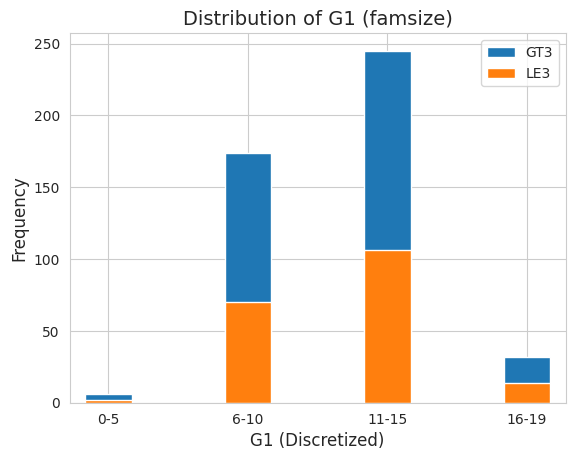

In [ ]:
famsize = df.copy()

# G1 Histogram for "famsize"
plt.hist(famsize[famsize['famsize']=='GT3']['G1_disc'],label='GT3')
plt.hist(famsize[famsize['famsize']=='LE3']['G1_disc'],label='LE3')
plt.title('Distribution of G1 (famsize)',fontsize=14)
plt.xlabel('G1 (Discretized)', fontsize=12)
plt.xlim([-0.1,3.1])
plt.xticks(ticks=[0.15,1.05,1.95,2.85],labels=['0-5','6-10','11-15','16-19'],fontsize=10)
plt.ylabel('Frequency',fontsize=12)
plt.legend()
plt.savefig('./figures/G1_famsize_histogram.jpg')
plt.show()

##### G2 ("famsize")

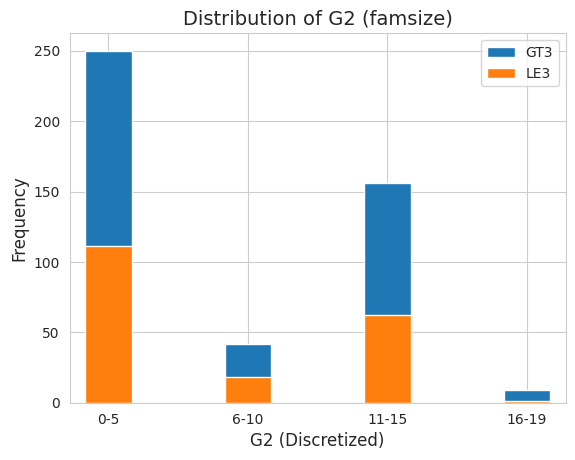

In [ ]:
# G2 Histogram for "famsize"
plt.hist(famsize[famsize['famsize']=='GT3']['G2_disc'],label='GT3')
plt.hist(famsize[famsize['famsize']=='LE3']['G2_disc'],label='LE3')
plt.title('Distribution of G2 (famsize)',fontsize=14)
plt.xlabel('G2 (Discretized)', fontsize=12)
plt.xlim([-0.1,3.1])
plt.xticks(ticks=[0.15,1.05,1.95,2.85],labels=['0-5','6-10','11-15','16-19'],fontsize=10)
plt.ylabel('Frequency',fontsize=12)
plt.legend()
plt.savefig('./figures/G2_famsize_histogram.jpg')
plt.show()

##### G3 ("famsize")

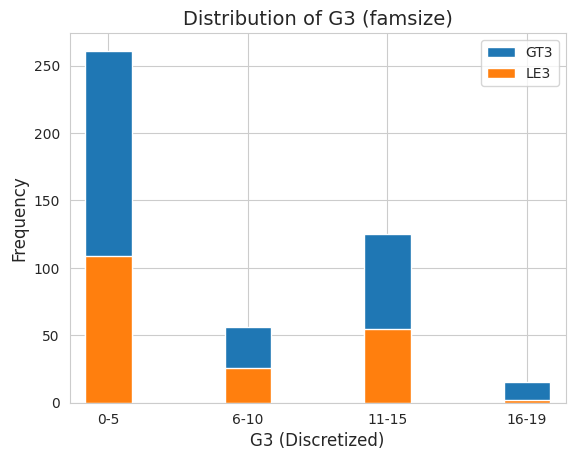

In [ ]:
# G3 Histogram for "famsize"
plt.hist(famsize[famsize['famsize']=='GT3']['G3_disc'],label='GT3')
plt.hist(famsize[famsize['famsize']=='LE3']['G3_disc'],label='LE3')
plt.title('Distribution of G3 (famsize)',fontsize=14)
plt.xlabel('G3 (Discretized)', fontsize=12)
plt.xlim([-0.1,3.1])
plt.xticks(ticks=[0.15,1.05,1.95,2.85],labels=['0-5','6-10','11-15','16-19'],fontsize=10)
plt.ylabel('Frequency',fontsize=12)
plt.legend()
plt.savefig('./figures/G3_famsize_histogram.jpg')
plt.show()

#### 2.4.3 Histograms for "Pstatus"

##### G1 ("Pstatus")

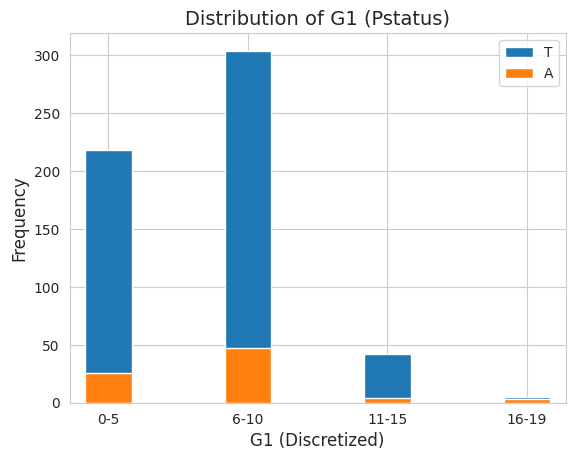

In [ ]:
Pstatus = df.copy()

# G1 Histogram for "Pstatus"
plt.hist(Pstatus[Pstatus['Pstatus']=='T']['G1_disc'],label='T')
plt.hist(Pstatus[Pstatus['Pstatus']=='A']['G1_disc'],label='A')
plt.title('Distribution of G1 (Pstatus)',fontsize=14)
plt.xlabel('G1 (Discretized)', fontsize=12)
plt.xlim([-0.1,3.1])
plt.xticks(ticks=[0.15,1.05,1.95,2.85],labels=['0-5','6-10','11-15','16-19'],fontsize=10)
plt.ylabel('Frequency',fontsize=12)
plt.legend()
plt.savefig('./figures/G1_Pstatus_histogram.jpg')
plt.show()

##### G2 ("Pstatus")

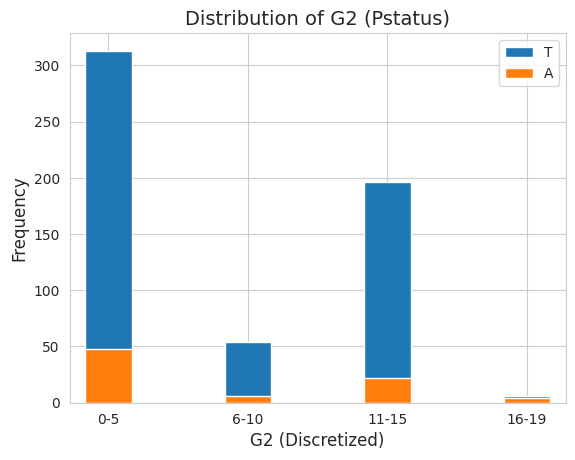

In [ ]:
# G2 Histogram for "Pstatus"
plt.hist(Pstatus[Pstatus['Pstatus']=='T']['G2_disc'],label='T')
plt.hist(Pstatus[Pstatus['Pstatus']=='A']['G2_disc'],label='A')
plt.title('Distribution of G2 (Pstatus)',fontsize=14)
plt.xlabel('G2 (Discretized)', fontsize=12)
plt.xlim([-0.1,3.1])
plt.xticks(ticks=[0.15,1.05,1.95,2.85],labels=['0-5','6-10','11-15','16-19'],fontsize=10)
plt.ylabel('Frequency',fontsize=12)
plt.legend()
plt.savefig('./figures/G2_Pstatus_histogram.jpg')
plt.show()

##### G3 ("Pstatus")

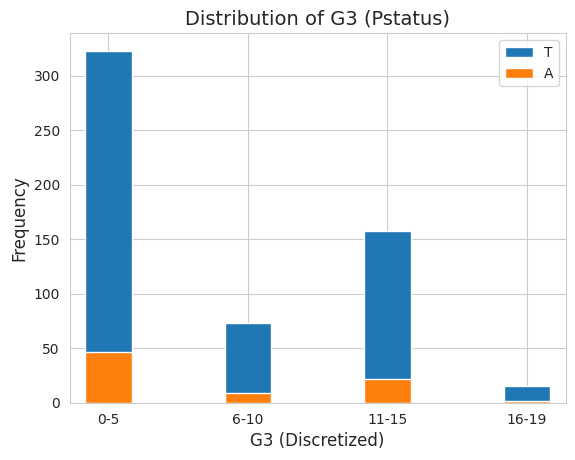

In [ ]:
# G3 Histogram for "Pstatus"
plt.hist(Pstatus[Pstatus['Pstatus']=='T']['G3_disc'],label='T')
plt.hist(Pstatus[Pstatus['Pstatus']=='A']['G3_disc'],label='A')
plt.title('Distribution of G3 (Pstatus)',fontsize=14)
plt.xlabel('G3 (Discretized)', fontsize=12)
plt.xlim([-0.1,3.1])
plt.xticks(ticks=[0.15,1.05,1.95,2.85],labels=['0-5','6-10','11-15','16-19'],fontsize=10)
plt.ylabel('Frequency',fontsize=12)
plt.legend()
plt.savefig('./figures/G3_Pstatus_histogram.jpg')
plt.show()

#### 2.4.4 Histograms for "sex"

##### G1 ("sex")

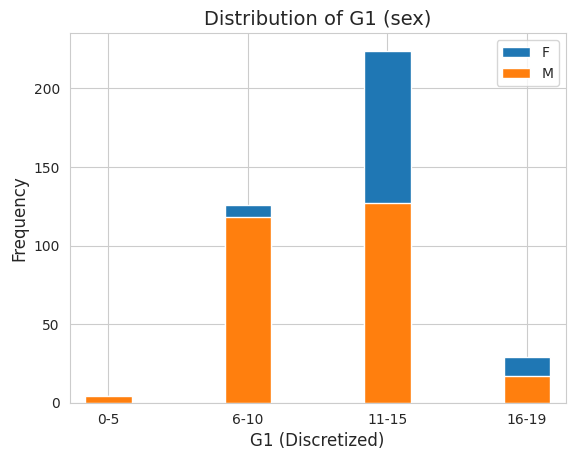

In [ ]:
sex = df.copy()

# G1 Histogram for "sex"
plt.hist(sex[sex['sex']=='F']['G1_disc'],label='F')
plt.hist(sex[sex['sex']=='M']['G1_disc'],label='M')
plt.title('Distribution of G1 (sex)',fontsize=14)
plt.xlabel('G1 (Discretized)', fontsize=12)
plt.xlim([-0.1,3.1])
plt.xticks(ticks=[0.15,1.05,1.95,2.85],labels=['0-5','6-10','11-15','16-19'],fontsize=10)
plt.ylabel('Frequency',fontsize=12)
plt.legend()
plt.savefig('./figures/G1_sex_histogram.jpg')
plt.show()

##### G2 ("sex")

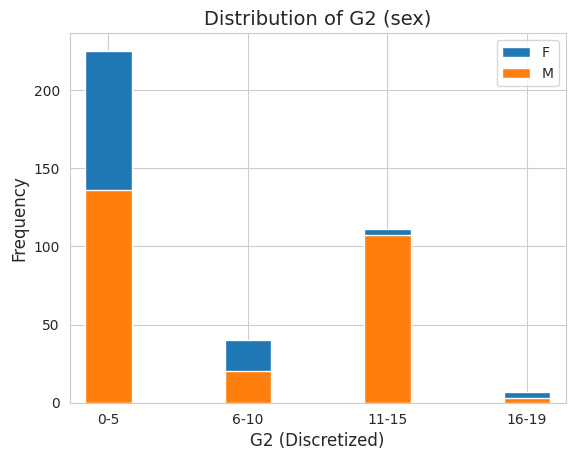

In [ ]:
# G2 Histogram for "sex"
plt.hist(sex[sex['sex']=='F']['G2_disc'],label='F')
plt.hist(sex[sex['sex']=='M']['G2_disc'],label='M')
plt.title('Distribution of G2 (sex)',fontsize=14)
plt.xlabel('G2 (Discretized)', fontsize=12)
plt.xlim([-0.1,3.1])
plt.xticks(ticks=[0.15,1.05,1.95,2.85],labels=['0-5','6-10','11-15','16-19'],fontsize=10)
plt.ylabel('Frequency',fontsize=12)
plt.legend()
plt.savefig('./figures/G2_sex_histogram.jpg')
plt.show()

##### G3 ("sex")

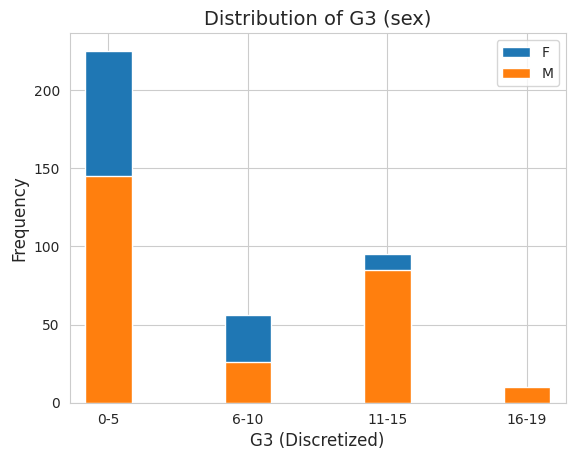

In [ ]:
# G3 Histogram for "sex"
plt.hist(sex[sex['sex']=='F']['G3_disc'],label='F')
plt.hist(sex[sex['sex']=='M']['G3_disc'],label='M')
plt.title('Distribution of G3 (sex)',fontsize=14)
plt.xlabel('G3 (Discretized)', fontsize=12)
plt.xlim([-0.1,3.1])
plt.xticks(ticks=[0.15,1.05,1.95,2.85],labels=['0-5','6-10','11-15','16-19'],fontsize=10)
plt.ylabel('Frequency',fontsize=12)
plt.legend()
plt.savefig('./figures/G3_sex_histogram.jpg')
plt.show()

# **Step 3:**

### 3.1 Identifying Privileged/Unprivileged Groups

In [ ]:
privileged_unprivileged = pd.DataFrame({})
privileged_unprivileged['Protected Class'] = ["age", "famsize", "Pstatus", "sex"]
privileged_unprivileged['Privileged Group'] = ["15-18", "LE3", "T", "Male"]
privileged_unprivileged['Unprivileged Group'] = ["19+", "GT3", "A", "Female"]
privileged_unprivileged.head(5)

,Protected Class,Privileged Group,Unprivileged Group
0,age,15-18,19+
1,famsize,LE3,GT3
2,Pstatus,T,A
3,sex,Male,Female


## 3.2 Fairness Metrics - Original Dataset

#### Variables for storing fairness metric results:

In [ ]:
variable_values = {}
unique_variable_names = [f"G{i + 1}_SP" for i in range(3)]
unique_variable_names.extend([f"G{i + 1}_SP_T" for i in range(3)])
unique_variable_names.extend([f"G{i + 1}_DI" for i in range(3)])
unique_variable_names.extend([f"G{i + 1}_DI_T" for i in range(3)])

for var_name in unique_variable_names:
    variable_values[var_name] = []

#### Preparing to Compute Fairness Metrics

In [ ]:
# Creating a df with columns specific to Step 3
step3_df = pd.DataFrame(data={})
step3_df['age'] = df['age']
df['age_grouped'] = df['age'].map({15:'15-16',16:'15-16', 17:'17-18',18:'17-18', 19:'19+',20:'19+',21:'19+',22:'19+'})
step3_df['age_grouped'] = df['age_grouped']
step3_df['age_binary'] = df['age_grouped'].map({'15-16':'<19', '17-18':'<19', '19+':'>=19'})
step3_df['famsize'] = df['famsize']
step3_df['Pstatus'] = df['Pstatus']
step3_df['sex'] = df['sex']
step3_df['G1'] = df['G1']
step3_df['G2'] = df['G2']
step3_df['G3'] = df['G3']
step3_df['G1_disc'] = df['G1_disc']
step3_df['G2_disc'] = df['G2_disc']
step3_df['G3_disc'] = df['G3_disc']

# Displaying the df
step3_df.head(5)

,age,age_grouped,age_binary,famsize,Pstatus,sex,G1,G2,G3,G1_disc,G2_disc,G3_disc
0,18,17-18,<19,GT3,A,F,0,11,11,0-5,11-15,11-15
1,17,17-18,<19,GT3,T,F,9,11,11,6-10,11-15,11-15
2,15,15-16,<19,LE3,T,F,12,13,12,11-15,11-15,11-15
3,15,15-16,<19,GT3,T,F,14,14,14,11-15,11-15,11-15
4,16,15-16,<19,GT3,T,F,11,13,13,11-15,11-15,11-15


#### Declaring Favorability Thresholds

In [ ]:
# Implementing a favorability threshold for each dependent variable
  # G1: Favorable = >=11, Unfavorable = <11
  # G2: Favorable = >=11, Unfavorable = <11
  # G3: Favorable = >=11, Unfavorable = <11
step3_df['G1_favorable'] = df['G1_disc'].map({'0-5':0, '6-10':0, '11-15':1, '16-19':1})
step3_df['G2_favorable'] = df['G2_disc'].map({'0-5':0, '6-10':0, '11-15':1, '16-19':1})
step3_df['G3_favorable'] = df['G3_disc'].map({'0-5':0, '6-10':0, '11-15':1, '16-19':1})

#### Calculating Fairness Metrics for the Original Dataset

In [ ]:
# Binarizing categorical values to ensure data-wise compatability with the aif360 library
step3_df_cast = step3_df.copy()
step3_df_cast['age_binary'] = step3_df_cast['age_binary'].map({'>=19':0, '<19':1})
step3_df_cast['famsize'] = step3_df_cast['famsize'].map({'GT3':0, 'LE3':1})
step3_df_cast['Pstatus'] = step3_df_cast['Pstatus'].map({'A':0, 'T':1})
step3_df_cast['sex'] = step3_df_cast['sex'].map({'F':0, 'M':1})

# Creating a pandas dataframe/dictionaries to store the fairness metrics
step3_2_results = pd.DataFrame(data={})
step3_2_results['Protected Class'] = ['age','famsize','Pstatus','sex']
step3_2_results['Privileged Group'] = ['<19', 'LE3', 'T', 'M']
step3_2_results['Unprivileged Group'] = ['>=19', 'GT3', 'A', 'F']
disparate_impacts = {'age': {'G1_favorable': 0, 'G2_favorable': 0, 'G3_favorable': 0}
                     ,'famsize': {'G1_favorable': 0, 'G2_favorable': 0, 'G3_favorable': 0}
                     ,'Pstatus': {'G1_favorable': 0, 'G2_favorable': 0, 'G3_favorable': 0}
                     ,'sex': {'G1_favorable': 0, 'G2_favorable': 0, 'G3_favorable': 0}}
statistical_parity_differences = {'age': {'G1_favorable': 0, 'G2_favorable': 0, 'G3_favorable': 0}
                                  ,'famsize': {'G1_favorable': 0, 'G2_favorable': 0, 'G3_favorable': 0}
                                  ,'Pstatus': {'G1_favorable': 0, 'G2_favorable': 0, 'G3_favorable': 0}
                                  ,'sex': {'G1_favorable': 0, 'G2_favorable': 0, 'G3_favorable': 0}}

# Creating a structure to store AIF360-processed datasets
original_datasets = {'G1': '', 'G2': '', 'G3': ''}

# Using AIF360 to calculate fairness metrics on the ORIGINAL dataset
for dependent_variable in ['G1_favorable','G2_favorable','G3_favorable']:
  step3_df_original = StandardDataset(step3_df_cast
                                      ,label_name=dependent_variable
                                      ,favorable_classes=[1]
                                      ,protected_attribute_names=['age_binary','famsize','Pstatus','sex']
                                      ,privileged_classes=[[1],[1],[1],[1]]
                                      ,features_to_keep = ['age_binary','famsize','Pstatus','sex','G1_favorable','G2_favorable','G3_favorable']
  )

  # Storing the StandardDataset for use during later steps
  original_datasets[dependent_variable[0:2]] = step3_df_original

  # Calculating Disparate Impacts and storing the results
  dis_for_table = []
  for protected_class in ['age_binary','famsize','Pstatus','sex']:
    disparate_impact = BinaryLabelDatasetMetric(step3_df_original, unprivileged_groups=[{protected_class:0}], privileged_groups=[{protected_class:1}]).disparate_impact()
    disparate_impacts[protected_class.split('_')[0]][dependent_variable] = disparate_impact
    dis_for_table.append(disparate_impact)
  step3_2_results[dependent_variable[0:2] + ' DI'] = dis_for_table

  # Calculating Statistical Parity Differences and storing the results
  sdps_for_table = []
  for protected_class in ['age_binary','famsize','Pstatus','sex']:
    statistical_parity_difference = BinaryLabelDatasetMetric(step3_df_original, unprivileged_groups=[{protected_class:0}], privileged_groups=[{protected_class:1}]).statistical_parity_difference()
    statistical_parity_differences[protected_class.split('_')[0]][dependent_variable] = statistical_parity_difference
    sdps_for_table.append(statistical_parity_difference)
  step3_2_results[dependent_variable[0:2] + ' SPD'] = sdps_for_table

# Displaying the fairness metrics for the ORIGINAL dataset
step3_2_results.head(5)

,Protected Class,Privileged Group,Unprivileged Group,G1 DI,G1 SPD,G2 DI,G2 SPD,G3 DI,G3 SPD
0,age,<19,>=19,0.422596,-0.366576,0.510098,-0.327944,0.650707,-0.248756
1,famsize,LE3,GT3,0.969803,-0.018873,0.950995,-0.032925,0.986531,-0.009471
2,Pstatus,T,A,1.048374,0.029416,1.046526,0.030009,1.005808,0.004042
3,sex,M,F,1.220228,0.119221,1.179788,0.105440,1.141282,0.090824


##3.3 & 3.4 Transforming the Original Dataset + Fairness Metrics - Transformed Dataset

In [ ]:
# Creating a pandas dataframe/dictionaries to store the fairness metrics
step3_4_results = pd.DataFrame(data={})
step3_4_results['Protected Class'] = ['age','famsize','Pstatus','sex']
step3_4_results['Privileged Group'] = ['<19', 'LE3', 'T', 'M']
step3_4_results['Unprivileged Group'] = ['>=19', 'GT3', 'A', 'F']
step3_4_results['Pre-Processing Algorithm'] = 'Reweighting'
disparate_impacts_transformed = {'age': {'G1_favorable': 0, 'G2_favorable': 0, 'G3_favorable': 0}
                     ,'famsize': {'G1_favorable': 0, 'G2_favorable': 0, 'G3_favorable': 0}
                     ,'Pstatus': {'G1_favorable': 0, 'G2_favorable': 0, 'G3_favorable': 0}
                     ,'sex': {'G1_favorable': 0, 'G2_favorable': 0, 'G3_favorable': 0}}
statistical_parity_differences_transformed = {'age': {'G1_favorable': 0, 'G2_favorable': 0, 'G3_favorable': 0}
                                  ,'famsize': {'G1_favorable': 0, 'G2_favorable': 0, 'G3_favorable': 0}
                                  ,'Pstatus': {'G1_favorable': 0, 'G2_favorable': 0, 'G3_favorable': 0}
                                  ,'sex': {'G1_favorable': 0, 'G2_favorable': 0, 'G3_favorable': 0}}

# Creating a structure to store (Transformed) AIF360-processed datasets
transformed_datasets = {'G1': '', 'G2': '', 'G3': ''}

# Using AIF360 to transform the datasets + calculate fairness metrics on the TRANSFORMED dataset
for dependent_variable in ['G1_favorable','G2_favorable','G3_favorable']:
  step3_df_temp = StandardDataset(step3_df_cast
                                  ,label_name=dependent_variable
                                  ,favorable_classes=[1]
                                  ,protected_attribute_names=['age_binary','famsize','Pstatus','sex']
                                  ,privileged_classes=[[1],[1],[1],[1]]
                                  ,features_to_keep = ['age_binary','famsize','Pstatus','sex','G1_favorable','G2_favorable','G3_favorable']
  )

  # Performing Reweighting
  weights = Reweighing(unprivileged_groups=[{'age_binary':0,'famsize':0,'Pstatus':0,'sex':0}],privileged_groups=[{'age_binary':1,'famsize':1,'Pstatus':1,'sex':1}])
  step3_df_transformed = weights.fit(step3_df_temp).transform(step3_df_temp)

  # Storing the (Transformed) StandardDataset for use during later steps
  transformed_datasets[dependent_variable[0:2]] = step3_df_transformed

  # Calculating Disparate Impacts and storing the results
  dis_for_table = []
  for protected_class in ['age_binary','famsize','Pstatus','sex']:
    disparate_impact = BinaryLabelDatasetMetric(step3_df_transformed, unprivileged_groups=[{protected_class:0}], privileged_groups=[{protected_class:1}]).disparate_impact()
    disparate_impacts_transformed[protected_class.split('_')[0]][dependent_variable] = disparate_impact
    dis_for_table.append(disparate_impact)
  step3_4_results[dependent_variable[0:2] + ' DI'] = dis_for_table

  # Calculating Statistical Parity Differences and storing the results
  sdps_for_table = []
  for protected_class in ['age_binary','famsize','Pstatus','sex']:
    statistical_parity_difference = BinaryLabelDatasetMetric(step3_df_transformed, unprivileged_groups=[{protected_class:0}], privileged_groups=[{protected_class:1}]).statistical_parity_difference()
    statistical_parity_differences_transformed[protected_class.split('_')[0]][dependent_variable] = statistical_parity_difference
    sdps_for_table.append(statistical_parity_difference)
  step3_4_results[dependent_variable[0:2] + ' SPD'] = sdps_for_table

# Displaying the fairness metrics for the TRANSFORMED dataset
step3_4_results.head(5)

/usr/local/lib/python3.10/dist-packages/aif360/algorithms/preprocessing/reweighing.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  self.w_up_fav = n_fav*n_up / (n*n_up_fav)
/usr/local/lib/python3.10/dist-packages/aif360/algorithms/preprocessing/reweighing.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  self.w_up_fav = n_fav*n_up / (n*n_up_fav)
/usr/local/lib/python3.10/dist-packages/aif360/algorithms/preprocessing/reweighing.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  self.w_up_fav = n_fav*n_up / (n*n_up_fav)


,Protected Class,Privileged Group,Unprivileged Group,Pre-Processing Algorithm,G1 DI,G1 SPD,G2 DI,G2 SPD,G3 DI,G3 SPD
0,age,<19,>=19,Reweighting,0.419826,-0.376380,0.513183,-0.329128,0.656721,-0.246420
1,famsize,LE3,GT3,Reweighting,0.907351,-0.061974,0.923309,-0.053147,0.963427,-0.026372
2,Pstatus,T,A,Reweighting,1.031321,0.019510,1.043545,0.028397,1.005882,0.004129
3,sex,M,F,Reweighting,1.154577,0.088581,1.151835,0.091362,1.120760,0.079197


# **Step 4:**

## 4.1 Training/Test Splits - Original Dataset

In [ ]:
# Splitting the ORIGINAL dataset into train/test sets
original_train_test = {'G1': {'train': '', 'test': ''}, 'G2': {'train': '', 'test': ''}, 'G3': {'train': '', 'test': ''}}
for dependent_variable in ['G1','G2','G3']:
  train, test = original_datasets[dependent_variable].split(num_or_size_splits=2,shuffle=True,seed=101)
  original_train_test[dependent_variable]['train'] = train
  original_train_test[dependent_variable]['test'] = test

## 4.2 Training/Test Splits - Transformed Dataset

In [ ]:
# Splitting the TRANSFORMED dataset into train/test sets
transformed_train_test = {'G1': {'train': '', 'test': ''}, 'G2': {'train': '', 'test': ''}, 'G3': {'train': '', 'test': ''}}
for dependent_variable in ['G1','G2','G3']:
  train, test = transformed_datasets[dependent_variable].split(num_or_size_splits=2,shuffle=True,seed=101)
  transformed_train_test[dependent_variable]['train'] = train
  transformed_train_test[dependent_variable]['test'] = test

##4.3 Train a Classifier - Original Training Dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
x_train_original, x_test_original, y_train_original, y_test_original = train_test_split(original_train_test["G1"]["train"].features, original_train_test["G1"]["train"].labels.ravel(), test_size=0.2, random_state=45)

classifier_original = RandomForestClassifier()
classifier_original.fit(x_train_original, y_train_original)
predictions = classifier_original.predict(x_test_original)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_original, predictions)
print("Original Dataset Accuracy:", accuracy)

Original Dataset Accuracy: 0.8461538461538461


##4.4 Train a Classifier - Transformed Training Dataset

In [ ]:
x_train_transformed, x_test_transformed, y_train_transformed, y_test_transformed = train_test_split(transformed_train_test["G1"]["train"].features, transformed_train_test["G1"]["train"].labels.ravel(), test_size=0.2, random_state=45)

classifier_original = RandomForestClassifier()
classifier_original.fit(x_train_transformed, y_train_transformed)
predictions = classifier_original.predict(x_test_transformed)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_transformed, predictions)
print("Transformed Dataset Accuracy:", accuracy)

Transformed Dataset Accuracy: 0.8307692307692308


##4.5 Classifier Fairness Metrics

In [ ]:
# Binarizing categorical values to ensure data-wise compatability with the aif360 library
step4_5_df_cast = y_test.copy()
print(step4_5_df_cast)
step4_5_df_cast['age_binary'] = step4_5_df_cast['age_binary'].map({'>=19':0, '<19':1})
step4_5_df_cast['famsize'] = step4_5_df_cast['famsize'].map({'GT3':0, 'LE3':1})
step4_5_df_cast['Pstatus'] = step4_5_df_cast['Pstatus'].map({'A':0, 'T':1})
step4_5_df_cast['sex'] = step4_5_df_cast['sex'].map({'F':0, 'M':1})

# Creating a pandas dataframe/dictionaries to store the fairness metrics
step4_5_results = pd.DataFrame(data={})
step4_5_results['Protected Class'] = ['age','famsize','Pstatus','sex']
step4_5_results['Privileged Group'] = ['<19', 'LE3', 'T', 'M']
step4_5_results['Unprivileged Group'] = ['>=19', 'GT3', 'A', 'F']
disparate_impacts = {'age': {'G1_favorable': 0, 'G2_favorable': 0, 'G3_favorable': 0}
                     ,'famsize': {'G1_favorable': 0, 'G2_favorable': 0, 'G3_favorable': 0}
                     ,'Pstatus': {'G1_favorable': 0, 'G2_favorable': 0, 'G3_favorable': 0}
                     ,'sex': {'G1_favorable': 0, 'G2_favorable': 0, 'G3_favorable': 0}}
statistical_parity_differences = {'age': {'G1_favorable': 0, 'G2_favorable': 0, 'G3_favorable': 0}
                                  ,'famsize': {'G1_favorable': 0, 'G2_favorable': 0, 'G3_favorable': 0}
                                  ,'Pstatus': {'G1_favorable': 0, 'G2_favorable': 0, 'G3_favorable': 0}
                                  ,'sex': {'G1_favorable': 0, 'G2_favorable': 0, 'G3_favorable': 0}}

# Creating a structure to store AIF360-processed datasets
original_datasets = {'G1': '', 'G2': '', 'G3': ''}

# Using AIF360 to calculate fairness metrics on the ORIGINAL dataset
for dependent_variable in ['G1_favorable','G2_favorable','G3_favorable']:
  step4_5_original = StandardDataset(step4_5_df_cast
                                      ,label_name=dependent_variable
                                      ,favorable_classes=[1]
                                      ,protected_attribute_names=['age_binary','famsize','Pstatus','sex']
                                      ,privileged_classes=[[1],[1],[1],[1]]
                                      ,features_to_keep = ['age_binary','famsize','Pstatus','sex','G1_favorable','G2_favorable','G3_favorable']
  )

  # Storing the StandardDataset for use during later steps
  original_datasets[dependent_variable[0:2]] = step4_5_df_original

  # Calculating Disparate Impacts and storing the results
  dis_for_table = []
  for protected_class in ['age_binary','famsize','Pstatus','sex']:
    disparate_impact = BinaryLabelDatasetMetric(step3_df_original, unprivileged_groups=[{protected_class:0}], privileged_groups=[{protected_class:1}]).disparate_impact()
    disparate_impacts[protected_class.split('_')[0]][dependent_variable] = disparate_impact
    dis_for_table.append(disparate_impact)
  step4_5_results[dependent_variable[0:2] + ' DI'] = dis_for_table

  # Calculating Statistical Parity Differences and storing the results
  sdps_for_table = []
  for protected_class in ['age_binary','famsize','Pstatus','sex']:
    statistical_parity_difference = BinaryLabelDatasetMetric(step3_df_original, unprivileged_groups=[{protected_class:0}], privileged_groups=[{protected_class:1}]).statistical_parity_difference()
    statistical_parity_differences[protected_class.split('_')[0]][dependent_variable] = statistical_parity_difference
    sdps_for_table.append(statistical_parity_difference)
  step4_5_results[dependent_variable[0:2] + ' SPD'] = sdps_for_table

# Displaying the fairness metrics for the ORIGINAL dataset
step4_5_results.head(5)

[0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.]


IndexError: ignored

##4.6 Classifier Results Table

In [ ]:
#

# **Step 5:** Final Project Report

In [ ]:
# Fairness Metrics Results Graph


##Explain which fairness metric (if any) is best and provide a justification for your answer

## Did any of these approaches seem to work to mitigate bias (or increase fairness)? Explain your reasoning. Did any group receive a positive advantage? Was any group disadvantaged by these approaches? What issues would arise if you used these methods to mitigate bias?